# 2025-09-17 Linear Algebra

* Algebra of linear transformations

* Polynomial evaluation and fitting

* Orthogonality

In [1]:
using Plots
default(lw=4, ms=5, legendfontsize=12, xtickfontsize=12, ytickfontsize=12)

## Matrices as linear transformations

Linear algebra is the study of linear transformations on vectors, which represent points in a finite dimensional space.
The matrix-vector product $y = A x$ is a linear combination of the columns of $A$.
The familiar definition,

$$ y_i = \sum_j A_{i, j} x_j $$

can also be viewed as

$$ y = \left[ A_{:, 1} \vert A_{:, 2} \vert \cdots \right] \begin{bmatrix} x_1\\ x_2\\ \vdots\\ \end{bmatrix} = \left[ A_{:, 1} \right] x_1 + \left[ A_{:, 2} \right] x_2 + \cdots $$

## Math and Julia notation

The notation $A_{i, j}$ corresponds to the Julia syntax `A[i,j]` and the colon `:` means the entire range (row or column).
So $A_{:, j}$ is the $j$th column and $A_{i, :}$ is the $i$th row.
The corresponding Julia syntax is `A[:,j]` and `A[i,:]`.

<br>

Julia has syntax for row vectors, column vectors, and arrays.

In [2]:
[1. 2 3; 4 5 6] # note - using . sets every value as a float
# Equivalent to Python's  np.array([[1, 2, 3], [4, 5, 6]])

2×3 Matrix{Float64}:
 1.0  2.0  3.0
 4.0  5.0  6.0

In [3]:
[1 2; 4 3] # Pay attention to the ordering

2×2 Matrix{Int64}:
 1  2
 4  3

In [4]:
[1 0; 0 2; 10 3] # ; separate rows

3×2 Matrix{Int64}:
  1  0
  0  2
 10  3

In [5]:
[1; 2 + 1im; 3]' # transpose

1×3 adjoint(::Vector{Complex{Int64}}) with eltype Complex{Int64}:
 1+0im  2-1im  3+0im

## Implementing multiplication by row

In [6]:
# We can impl A * x by hand to check our understanding of the syntax
function matmult1(A, x)
    m, n = size(A)
    y = zeros(m)
    for i in 1:m
        for j in 1:n
            y[i] += A[i,j] * x[j]
        end
    end
    y
end

@show A = reshape(1.:12, 3, 4) # 3x4 matrix
@show x = [10., 0, 0, 0]
@show matmult1(A, x);

A = reshape(1.0:12, 3, 4) = [1.0 4.0 7.0 10.0; 2.0 5.0 8.0 11.0; 3.0 6.0 9.0 12.0]
x = [10.0, 0, 0, 0] = [10.0, 0.0, 0.0, 0.0]
matmult1(A, x) = [10.0, 20.0, 30.0]


In [7]:
# Julia has syntax for dot product
@show size(A[2, :]')
@show size(x)
@show A[2, :]' * x;
# What would happen if the multiplication was in the other order?

size((A[2, :])') = (1, 4)
size(x) = (4,)
(A[2, :])' * x = 20.0


In [8]:
# Let's simplify with the dot product syntax
function matmult2(A, x)
    m, n = size(A)
    y = zeros(m)
    for i in 1:m
        y[i] = A[i,:]' * x
    end
    y
end

@show matmult2(A, x);

matmult2(A, x) = [10.0, 20.0, 30.0]


## Implementing multiplication by column

In [9]:
# One more time, but by the columns
function matmult3(A, x)
    m, n = size(A)
    y = zeros(m)
    for j in 1:n
        y += A[:, j] * x[j]
    end
    y
end

matmult3(A, x)

3-element Vector{Float64}:
 10.0
 20.0
 30.0

In [10]:
# Naturally though, Julia has this built in
A * x

3-element Vector{Float64}:
 10.0
 20.0
 30.0

## Polynomial evaluation is (continuous) linear algebra

We can evaluate polynomials using matrix-vector multiplication.

For example,

$$ -3 x + 5 x^3 = \left[ 1 \vert x \vert x^2 \vert x^3 \right] \begin{bmatrix} 0\\ -3\\ 0\\ 5\\ \end{bmatrix} $$

In [11]:
using Polynomials
P(x) = Polynomial(x)

# Let's manipulate some polynomial coefficients
p = [0, -3, 0, 5]
q = [1, 2, 3, 4]
f = P(p) + P(q)

# Either representation should be the same
@show f
@show P(p+q)

# And lets evaluatethis polynomial at some list of points
x = [0., 1, 2]
f.(x)

f = Polynomial(1 - x + 3*x^2 + 9*x^3)
P(p + q) = Polynomial(1 - x + 3*x^2 + 9*x^3)


3-element Vector{Float64}:
  1.0
 12.0
 83.0

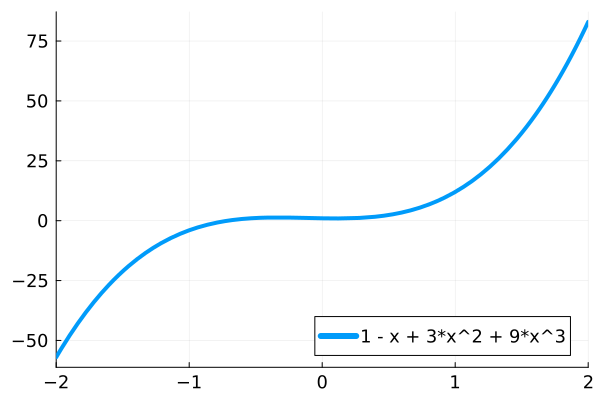

In [12]:
plot(f, legend=:bottomright, xlim=(-2, 2)) # Julia got the label right

## Polynomial evaluation is (discrete) linear algebra

In [13]:
# Let's make a matrix of monomial values evaluated at points
V = [one.(x) x x.^2 x.^3]

3×4 Matrix{Float64}:
 1.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0
 1.0  2.0  4.0  8.0

In [14]:
# And lets multiply that by our coeffs
V * p + V * q;
V * (p + q)

3-element Vector{Float64}:
  1.0
 12.0
 83.0

## Vandermonde matrices

A Vandermonde matrix is one whose columns are functions evaluated at discrete points.

$$ V \left( x \right) = \left[ 1 \vert x \vert x^2 \vert x^3 \vert \cdots \right] $$

In [15]:
# Let's populate a Vandermonde matrix ourselves
function vander(x, k=nothing)
    if isnothing(k)
        k = length(x)
    end
    m = length(x)
    V = ones(m, k)
    for j in 2:k
        V[:, j] = V[:, j-1] .* x
    end
    V
end

vander (generic function with 2 methods)

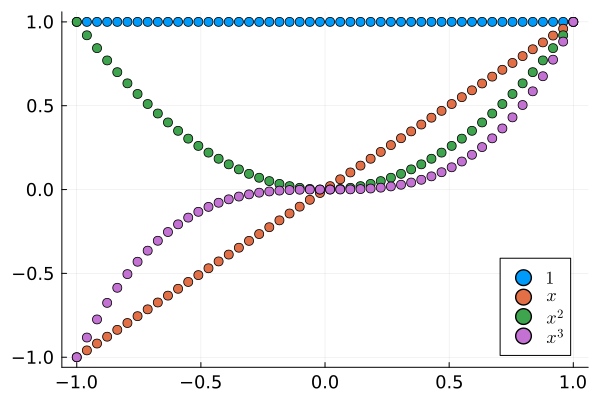

In [16]:
x = LinRange(-1, 1, 50)
V = vander(x, 4)
scatter(x, V, legend=:bottomright, label=["\$1\$" "\$x\$" "\$x^2\$" "\$x^3\$"])

## Fitting is linear algebra

$$ \left[ 1 \vert x \vert x^2 \vert x^3 \vert \cdots \right] \left[ p \right] = \left[ y \right] $$

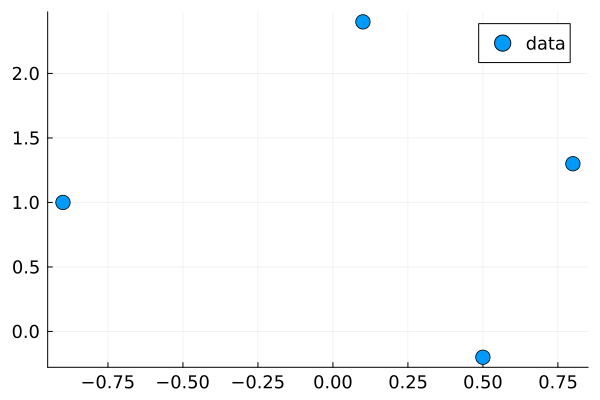

In [17]:
# Let's pick some points to fit a curve to
x1 = [-.9, 0.1, .5, .8]
y1 = [1, 2.4, -.2, 1.3]
scatter(x1, y1, markersize=8, label="data")

size(V) = (4, 4)


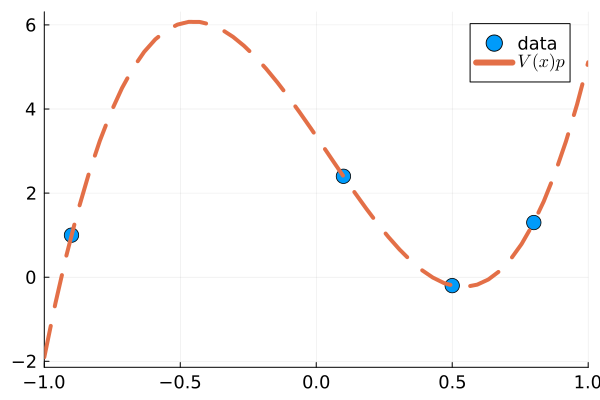

In [18]:
V = vander(x1)
@show size(V)

# Write y1 in the polynomial basis
p = V \ y1

# And plot the result
scatter(x1, y1, markersize=8, xlims=(-1, 1), label="data")
plot!(x, vander(x, 4) * p, label="\$ V(x) p\$", linestyle=:dash)

## Some common terminology

* The **range** of $A$ is the space spanned by its columns.
This definition coincides with the range of a function $f \left( x \right)$ when $f \left( x \right) = A x$.

* The (right) **nullspace** of $A$ is the space of vectors $x$ such that $A x = 0$.

* The **rank** of $A$ is the dimension of its range.

* A matrix has **full rank** if the nullspace of either $A$ or $A^T$ is empty (only the $0$ vector). Equivalently, if all the columns of $A$ (or $A^T$) are linearly independent.

* A **nonsingular** (or **invertible**) matrix is a square matrix of full rank. We call the inverse $A^{-1}$ and it satisfies $A^{-1} A = A A^{-1} = I$.

<br>

If $A \in \mathcal{R}^{m \times m}$, which of these doesn't belong?

1. $A$ has an inverse $A^{-1}$

2. $rank \left( A \right) = m$

3. $null \left( A \right) = \left\lbrace 0 \right\rbrace$

4. $A A^T = A^T A$

5. $det \left( A \right) \neq 0$

6. $A x = 0$ implies that $x = 0$

In [19]:
using LinearAlgebra

# Let's test the suspicious one
A = rand(4, 4)
B = A' * A - A * A'
@show B
det(A)

B = [0.4786659078573863 -0.6058243282505108 -0.08431381808611738 0.17379748782488802; -0.6058243282505108 -0.3523217832765442 -0.17822736587576016 0.21136858880960374; -0.08431381808611738 -0.17822736587576016 -0.12151179661611133 0.5425185862055443; 0.17379748782488802 0.21136858880960374 0.5425185862055443 -0.004832327964730654]


0.07104701982881283

## What is an inverse

When we write $x = A^{-1} y$, we mean that $x$ is the unique vector such that $A x = y$.
(It is rare that we explicitly compute a matrix $A^{-1}$, though [it's not as "bad"](https://arxiv.org/abs/1201.603https://arxiv.org/abs/1201.6035) as people may have told you.)
A vector $y$ is equivalent to $\sum_i e_i y_i$ where $e_i$ are columns of the identity. Meanwhile, $x = A^{-1} y$ means that we are expressing that same vector $y$ in the basis of the columns of $A$, i.e., $\sum_i A_{:, i} x_i$.

In [20]:
# Let's grab a matrix
A = rand(4, 4)

4×4 Matrix{Float64}:
 0.626678    0.673801  0.656624  0.0796999
 0.948769    0.105608  0.530424  0.930987
 0.681706    0.24679   0.400818  0.572381
 0.00619773  0.905357  0.750307  0.139434

In [21]:
# And take its inverse via backslash
A \ A

4×4 Matrix{Float64}:
  1.0           7.31358e-17  -1.32838e-17  -1.22347e-16
 -4.21113e-16   1.0           1.83308e-16  -5.62053e-16
  5.27068e-16  -2.03387e-16   1.0           7.20475e-16
 -9.9441e-17    3.77455e-17   1.50873e-16   1.0

In [22]:
# And via inv()
inv(A) * A

4×4 Matrix{Float64}:
  1.0           2.6886e-17   -1.07425e-16  -3.06659e-16
 -8.06184e-16   1.0           5.78853e-16  -4.69639e-16
  5.14419e-16  -3.06496e-16   1.0          -9.91941e-17
 -3.70712e-16   2.41317e-16   2.29375e-16   1.0

## Inner products and orthogonality

The **inner product**

$$ x^T y = \sum_i x_i y_i $$

of vectors (or columns of a matrix) tells us about their magnitude and about the angle.
The **norm** is induced by the inner product,

$$ \left\lvert \left\lvert x \right\rvert \right\rvert = \sqrt{x^t x} $$

and the angle $\theta$ is defined by

$$ cos \left( \theta \right) = \frac{x^T y}{\left\lvert \left\lvert x \right\rvert \right\rvert \left\lvert \left\lvert y \right\rvert \right\rvert} $$

Inner products are **bilinear**, which means that they satisfy some convenient algebraic properties

$$ \left( x + y \right)^T z = x^T z + y^T z $$
$$ x^T \left( y + z \right) = x^T y + x^T z $$
$$ \left( \alpha x \right)^T \left( \beta y \right) = \alpha \beta x^T y $$

## Examples with inner products

In [23]:
x = [0, 1]
y = [1, 1]

# Let's take some inner products
@show x' * y
@show y' * x;

x' * y = 1
y' * x = 1


In [24]:
# Let's define a vector from an angle
@show ϕ = π/6
@show y = [cos(ϕ), sin(ϕ)]

# Let's compute and use the angle between x and y
println()
@show cos_θ = x' * y / (norm(x) * norm(y))
@show θ = acos(cos_θ)
@show rad2deg(θ)

# And compare to our original angle
println()
@show cos(ϕ - π/2);

ϕ = π / 6 = 0.5235987755982988
y = [cos(ϕ), sin(ϕ)] = [0.8660254037844387, 0.49999999999999994]

cos_θ = (x' * y) / (norm(x) * norm(y)) = 0.49999999999999994
θ = acos(cos_θ) = 1.0471975511965979
rad2deg(θ) = 60.00000000000001

cos(ϕ - π / 2) = 0.4999999999999999


## Polynomials can be orthogonal too

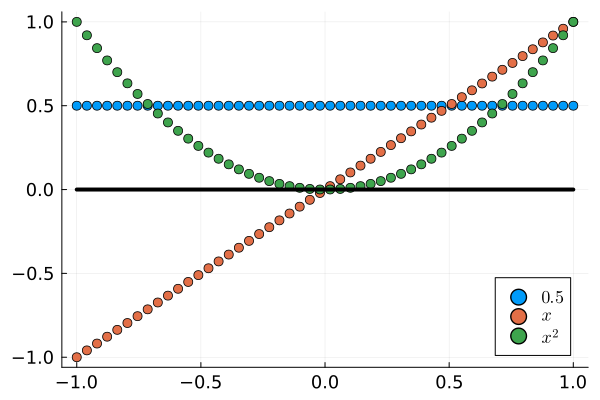

In [25]:
x = LinRange(-1, 1, 50)
A = vander(x, 4)
M = A * [.5 0 0 0; # 0.5
         0  1 0 0;  # x
         0  0 1 0]' # x^2

scatter(x, M, label=["\$0.5\$" "\$x\$" "\$x^2\$"])
plot!(x, 0*x, label=:none, color=:black)

Which inner products will be zero?

Which functions are even and odd?

## Polynomial inner products

In [26]:
# < 0.5, x >
@show M[:,1]' * M[:,2]

# < 0.5, x^2 >
@show M[:,1]' * M[:,3]

# <x, x^2 >
@show M[:,2]' * M[:,3];

(M[:, 1])' * M[:, 2] = -2.220446049250313e-16
(M[:, 1])' * M[:, 3] = 8.673469387755103
(M[:, 2])' * M[:, 3] = -4.440892098500626e-16
